# Import the library

In [2]:
import VyPRAnalysis as analysis

ImportError: No module named VyPRAnalysis

# Setting the URL of the verdict server

In order to change the default server URL, use function set_server with the string containing the new address as an argument.

In [2]:
analysis.set_server("http://localhost:9001/")

# Initialising a class

The name of each class and its attributes match the names of the corresponding table and its columns in the database. In order to initialise an object of class, it is required to pass one or more arguments to the initialising function. In all cases, passing just the ID of the object is enough, as this attribute always determines a row of the table in the database uniquely. However, in some of the tables there are other attributes that belong to a unique row in the table, i.e. the so-called atom index, the name of the function etc. In these cases, it is also possible to initialise the class by passing just one argument. The initialising function then queries the database to get the corresponding row in the table and creates a class with all attributes values.
For example, in order to get a variable of class type function, you can use one of the options shown below. The first and the second ones are used to find a row in table function with id=1, wheareas the last one determines a row in the table by its name attribute.


In [3]:
f1=analysis.function(1)
f1=analysis.function(id=1)
f1=analysis.function(fully_qualified_name="app.routes.paths_branching_test")


Note: in case there are more functions with the same name (which shouldn't happen), the class is initialised as one of the rows without raising an error that there are more of them with the same value.

As some functions in the library, and possibly others defined by the user, might return all the attributes in the row, in order to avoid the inefficiency of querying the database to find what is already known, it is also possible to define the class variable by passing all of the values to the initialising function which, in this case, assigns the given values to corresponding attributes without connecting to the database.


In [4]:
f1=analysis.function(id=1, fully_qualified_name='app.routes.paths_branching_test', property='734d1510681a11c32da16934e170c70804b5328b')

In [5]:
print(f1.fully_qualified_name)

app.routes.paths_branching_test


# Object functions

Apart from attributes that each class has, for some of the classes it makes sense to define certain functions. In this section it is described how to use the functions which are defined within a class. Functions are listed as class_name.function_name and followed by their description.

### function.get_calls() 

This function returns a list of function_call objects that are the calls of the given function. If passed an optional argument, it returns the list of such calls, but during the http request with given ID value.

Example:

In [6]:
calls_list=f1.get_calls(request=analysis.http_request(1))
print(len(calls_list))

1


### function.get_calls_with_verdict(verdict_value)

This function returns a list of function_call classes such that they are calls of the given function and their verdicts are true (verdict_value=1) or false (verdict_value=0).

Example:

In [7]:
calls_failed=f1.get_calls_with_verdict(0)
print(len(calls_failed))

2


### function.get_graph()

This function returns the SCFG of the given function.

### function_call.get_falsifying_observation() 

Returns the first (with respect to verdicts) observation that causes failure for the given call.

Example:

In [8]:
call=calls_failed[0]
obs=call.get_falsifying_observation()
print(vars(obs))

{'observed_value': u'1.102085', 'instrumentation_point': 1, 'previous_condition': 1, 'verdict': 1, 'atom_index': 0, 'id': 1}


### function_call.get_verdicts() 

Returns a list of verdicts for the given function call.

Example:

In [9]:
verdicts_list=call.get_verdicts(0)

### function_call.get_observations()

Creates a list of observation classes that occurred during the given function call.

### verdict.get_property_hash()

This object function within a verdict class finds the function which the verdict concerns and returns its property hash attribute.

### verdict.get_collapsing_atom() 

Returns an atom object which is the collapsing atom of the verdict.

Example:

In [10]:
v=verdicts_list[0]
a=v.get_collapsing_atom()

### http_request.get_calls()

Returns a list of function_call objects that occurred during the given request.

### atom.get_structure()

Desiralises the formula structure in the atom object.

Example:

In [11]:
print(a.get_structure())

d(t = StaticTransition(operates_on=f)) in [0, 1]


### instrumentation_point.get_observations()

For the given instrumentation point class, this function creates and returns a list of observations (as classes) which concern this instrumentation point.

### observation.get_assignments()

Returns a list of assignment objects concerning the given observation.

Example:

In [12]:
assignments=obs.get_assignments()
for a in assignments:
    print(vars(a))

### observation.get_assignments_as_dictionary()

Has the same function as the previously listed function get_assignments(), but returns the assignments in a dictionary format.

### observation.verdict_severity()

Calculates the minimum distance between the observed value and the constraint defined by its atom, assigned a positive sign if the condition is satisfied and a negative one if not.

### observation.get_instrumentation_point()

Returns a variable of class instrumentation_point that describes the instrumentation point at which the observation was made.

# Other functions

In this section, functions that do not belong to a certain class are listed.

### list_verdicts_with_value(verdict_value)

For a given verdict_value which is either zero 0 or 1, the function returns a list of verdict objects that failed (verdict_value=0) or managed (verdict_value=1) to satisfy the constraint.

### list_verdicts_dict_with_value(verdict_value)

For a given verdict_value which is either zero 0 or 1, the function returns a list of verdict objects that failed (verdict_value=0) or managed (verdict_value=1) to satisfy the constraint, but in a form of a dictionary containing additional possibly useful keys and values:
- from verdict: id, binding, verdict, time_obtained
- from function_call: function, time_of_call
- from function: fully_qualified_name, property

Example:

In [13]:
true_verdicts=analysis.list_verdicts_dict_with_value(1)
for v in true_verdicts:
	print("function id=",v["function"])
	print("verdict time:",v["time_obtained"])

('function id=', 1)
('verdict time:', u'2019-08-07T17:34:34.642410')
('function id=', 1)
('verdict time:', u'2019-08-07T17:34:34.674488')


### get_atom_list(verdict_value)

Returns a list of atom objects that are collapsing atoms of all true (verdict_value=1) or false (verdict_value=0) verdicts.

Example:

In [14]:
list=analysis.get_atom_list(0)
print(list[0].get_structure())

d(t = StaticTransition(operates_on=f)) in [0, 1]


### write_scfg(scfg_object,file_name)

Writes a graph of the scfg into the file file_name.

### list_observations()

Returns a list of items with type class observation.

# Plot: verdict severity vs time

Apart from an observation not satisfying the constraint, it might be of interest to know by how much it violates it. If it does satisfy the constraint, how close is it to violation? The function 'verdict_severity' in the analysis library measures the distance between the observed value and the interval boundaries, assigned a negative sign if the value is not in the interval.

In order to analyse if there are values assigned to the variables at that instrumentation point which are more likely to cause a failure, we group the observations by valuations and create a separate plot for each 'group'.

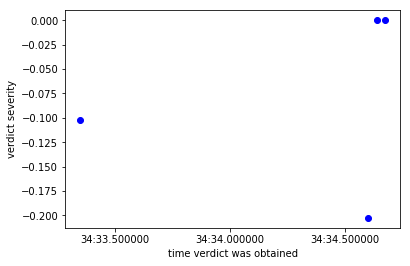

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pickle

def plot_severity_vs_time(f,severity_function=analysis.verdict_severity):
    #get a function call of the given function such that there was a failure during the call
    call=f.get_calls_with_verdict(0)[0]

    #find the first observation wrt verdicts that caused the failure
    failed_observation=call.get_falsifying_observation()

    #find the instrumentation point at which the failed observation failed
    inst_point=failed_observation.get_instrumentation_point()

    #get all the observations of that instrumentation point, whether they failed or not
    observations=inst_point.get_observations()
    ids=[] #will contain IDs of assignments
    t=[]
    s=[]

    #grouping observations by the assignments they are paired with
    #t and s are lists, they have as many elements as there are groups (assignments)
    #their elements are lists of time points and verdict severity values
    valuations=[]
    for obs in observations:
        assignments=obs.get_assignments()
        #print(obs.id)
        final_dict=dict()
        for a in assignments:
            a=vars(a)
            a["value"]=pickle.loads(a["value"])
            #print(a)
            final_dict[a["variable"]]=a["value"]

        if final_dict not in valuations:
            valuations.append(final_dict)
            t.append([])
            s.append([])

        time=analysis.verdict(obs.verdict).time_obtained
        t[valuations.index(final_dict)].append(datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.%f'))
        s[valuations.index(final_dict)].append(severity_function(obs))
     
    
    for v in valuations:
        ind=valuations.index(v)
        plt.plot(t[ind],s[ind],'ob')
        plt.xlabel('time verdict was obtained')
        plt.ylabel('verdict severity')
        plt.margins(0.05)
        plt.show()        
        
plot_severity_vs_time(f1)

# Path reconstruction functions

If grouping observations by valuations does not show a significant difference in verdict severity, it is reasonable to seek for another explanation. The path a program run took before a certain observation was made might be one of the factors that makes a difference. To analyse the effect of the paths on the verdict, one must first be able to reconstruct a path.

### get_parametric_path(obs_id_list, instrumentation_point_id)

This function finds the parametric path taken by the runs which generated the given observations, on condition that all the observations were made at the same instrumentation point.

### get_paths_from_observations(function_name,obs_id_list,inst_point)

Given the name of the function of interest, a list of observations' IDs and the instrumentation point at which the obseravtions were made, this function returns a list of paths that were taken before the given observations were made.

### get_intersection_from_observations(function_name,obs_id_list,inst_point)

Similar to the previous one, this function takes the name of the function of interest and a list of IDs of observations the paths to which we want to analyse. The instrumentation point ID is an optional argument, but all the observations must be made at the same instrumentation point. The function returns the intersection of the paths taken to the given observations.

### edit_code(path)

For a given path intersection, this function finds the branching points in the code and highlights the lines at which the branching occurs.

## Highlighting the branching points in the code

Using the above mentioned function that finds the intersection of the paths taken up to given observations, along with the function $\texttt{edit_code()}$, it is possible to find the branching points in the code.

Example:

In [ ]:
print(analysis.get_intersection_from_observations('app.routes.paths_branching_test',[6,7,8],1))